# PHYS 308 - Notebook 06 - Accuracy 

Interactive learning notebook developed by J. Dolen for PHYS 308 at Purdue University Northwest

Reference: Mark Newman "Computational Physics" Chapter 4 

## Allowable ranges in python

In [3]:
# compute factorial using int
factorial = 1
n = 1000
for k in range (1,n):
    factorial*=k
print(type(factorial))
print(factorial)

<class 'int'>
40238726007709377354370243392300398571937486421071463254379991042993851239862902059204420848696940480047998861019719605863166687299480855890132382966994459099742450408707375991882362772718873251977950595099527612087497546249704360141827809464649629105639388743788648733711918104582578364784997701247663288983595573543251318532395846307555740911426241747434934755342864657661166779739666882029120737914385371958824980812686783837455973174613608537953452422158659320192809087829730843139284440328123155861103697680135730421616874760967587134831202547858932076716913244842623613141250878020800026168315102734182797770478463586817016436502415369139828126481021309276124489635992870511496497541990934222156683257208082133318611681155361583654698404670897560290095053761647584772842188967964624494516076535340819890138544248798495995331910172335555660213945039973628075013783761530712776192684903435262520001588853514733161170210396817592151090778801939317811419454525722386554146106289218796

In [7]:
# compute factorial using float
factorial = 1.0
n = 200
for k in range (1,n):
    factorial*=k
print(type(factorial))
print(factorial)

<class 'float'>
inf


### Overflow and underflow

#### Max values

In python 3:

* int have no maximum (limited only by the size of your computers memory) 
    * They have arbitrary precision
    * In some cases displaying a very large int will take a long time
* float are limited to $\sim 10^{308}$


Note: in python 2 there was a limit for int, and there was a seperate type called long


#### Overflow 
* Definition: when you execute a statment which produces a float above the largest possible floating point number
* When you overflow, python does **not** return an error message (it may return a warning). 
    * Instead, python sets the variable equal to infinity (inf)
        * Check for this otherwise your program could return wrong answers
    
#### Min values (smallest magnitdue)
In python 3:
* In theory, floats are limted to $\sim 10^{-308}$ 
* In practice, your system may allow smaller numbers but with lost precision ("gradual underflow)
* Example: On my system floats are limited to $\sim 10^{-324}$ 


#### Underflow 
* Definition: when you execute a statment which produces a float with magnitude below the smallest possible floating point number
* When you underflow, python does **not** return an error message (it may return a warning). 
    * Instead, python sets the variable equal to 0.0
        * Check for this otherwise your program could return wrong answers
   

In [1]:
# float infinity behavior
infinity = float("inf")
print(infinity)
print(infinity / 10000)

inf
inf


In [18]:
## Check the previous statements
x = 1.7e308
print(type(x))
y = x * 10
w = 1.0e-323  #2.5e-323
z = w * 0.1

print("x =",x)
print("y =",y)
print("w =",w)
print("z =",z)


<class 'float'>
x = 1.7e+308
y = inf
w = 1e-323
z = 0.0


In [21]:
a = 1.123456789123456789e-307  
b = 1.123456789123456789e-308 
c = 1.123456789123456789e-309 
d = 1.123456789123456789e-310 
e = 1.123456789123456789e-311 
f = 1.123456789123456789e-312 
g = 1.123456789123456789e-313 
h = 1.123456789123456789e-314 
print("a =",a)
print("b =",b)
print("c =",c)
print("d =",d)
print("e =",e)
print("f =",f)
print("g =",g)
print("h =",h)

a = 1.1234567891234568e-307
b = 1.1234567891234565e-308
c = 1.12345678912346e-309
d = 1.12345678912344e-310
e = 1.1234567891235e-311
f = 1.123456789124e-312
g = 1.1234567891e-313
h = 1.123456789e-314


Python has a module sys which allows you to check computer specific parameters:
https://docs.python.org/3.6/library/sys.html

In [12]:
import sys
print('my operating system is',sys.platform)

my operating system is darwin


In [13]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [14]:
sys.float_info.max

1.7976931348623157e+308

In [15]:
sys.float_info.min

2.2250738585072014e-308

Lets experiment with another function provided by numpy:  nextafter
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.nextafter.html

nextafter returns the next discrete representable floating point number after some input value

syntax:  nextafter( x1, x2)  

returns the next representable values of x1 in the direction of x2.

(x2 tells it the direction up or down )

In [22]:
import numpy as np
print( np.nextafter(0, 1) )

5e-324


According to nextafter the smallest number that is bigger than 0 is

5e-324

But sys.float_info.min reports

2.2250738585072014e-308

Explanation: I told you earlier that if there is underflow (numbers less than the smallest mangitude number allowed in pyhon) than python sets the variable to be equal to 0.0.

Really, python sets the variable to be equal to a "denormal number". This is a number which is smaller than the smallest number but with less precision (significant digits are dropped).

This is called "gradual underflow". Instead of having a hard cutoff where you set the variable to 0.0, you first set the variable with the proper float but with less precision than a typical float.

Recall from above that digits were lost:

In [279]:
w = 2.2242424242424242424e-308 # w =2.5e-323
z = w * 0.00000001
print("w =",w)
print("z =",z)

w = 2.224242424242424e-308
z = 2.22424243e-316


In [280]:
### check min
P = 1 
for i in range(101):
    P*=5.e-4
    print(P)

0.0005
2.5e-07
1.25e-10
6.250000000000001e-14
3.125000000000001e-17
1.5625000000000004e-20
7.812500000000002e-24
3.906250000000001e-27
1.9531250000000008e-30
9.765625000000004e-34
4.882812500000002e-37
2.441406250000001e-40
1.2207031250000005e-43
6.103515625000003e-47
3.051757812500002e-50
1.525878906250001e-53
7.629394531250005e-57
3.8146972656250023e-60
1.9073486328125013e-63
9.536743164062506e-67
4.7683715820312535e-70
2.3841857910156268e-73
1.1920928955078134e-76
5.960464477539067e-80
2.9802322387695333e-83
1.4901161193847667e-86
7.450580596923834e-90
3.725290298461917e-93
1.8626451492309587e-96
9.313225746154793e-100
4.656612873077397e-103
2.3283064365386985e-106
1.1641532182693493e-109
5.820766091346747e-113
2.9103830456733736e-116
1.455191522836687e-119
7.275957614183435e-123
3.637978807091717e-126
1.8189894035458585e-129
9.094947017729293e-133
4.547473508864647e-136
2.2737367544323235e-139
1.1368683772161617e-142
5.6843418860808085e-146
2.8421709430404043e-149
1.421085471520202

In [281]:
### check max
P = 1 
for i in range(1,40,4):
    print(np.exp(i**2))

2.71828182846
72004899337.4
1.50609731459e+35
2.48752492832e+73
3.24418244604e+125
3.34092340766e+191
2.71675946966e+271
inf
inf
inf


/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


### Warning:
Logical errors can happen when you are dealing with overflow and underflow situations


In [23]:
a,b = 1.0e500, 7.0e500
a==b

True

In [24]:
print(a,b)

inf inf


In [284]:
math.isinf(a)

True

In [285]:
np.isinf(b)

True

In [286]:
c = a/b

In [287]:
c == c

False

In [288]:
print(c)

nan


nan = not a number 

this is not even equal to itself




In [289]:
math.isnan(c)

True

In [290]:
np.isnan(c)

True

Another interesting sys variable is maxsize which returns the maximum number of entries in a list in python:

In [25]:
sys.maxsize

9223372036854775807

This number is based on your computer:

In [26]:
print(2**31 - 1) # 32-bit 
print(2**63 - 1) # 64-bit

2147483647
9223372036854775807


## Python float precision and numerical error

recall earlier example:

In [293]:
(1/50.0)*50.0

1.0

In [294]:
(1/49.0)*49.0

0.9999999999999999

There must be some rounding error.

Consider the variable pi:

* pi_actual  = 3.1415926535897932384626&nbsp;&nbsp;&nbsp;# first 23 digits of pi
* pi_python  = 3.141592653589793&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;# from math.pi
* difference = 0.0000000000000002384626&nbsp;&nbsp;# rounding error


Rounding doesn't only occur with irrational numbers in python. Any number whose true value has more than 16 significant figures will be rounded.

One must also consider the binary representation


In [27]:
0.1+0.1+0.1

0.30000000000000004

What happened? 
* If the computer used base 10, no rounding would be needed.
* But in base 2 (binary), 0.1 represented as a binary fraction contains infinitely repeating numbers 0.0001100110011001100110011001100110011001100110011...
* So just like the decimal fraction 1/3 is infinitely repeating in base 10, 1/10 is infinitely repeating in base 2

"Floating point" - the decimal is moved by the number of places indicated by the exponent ( variant of scientific notation)


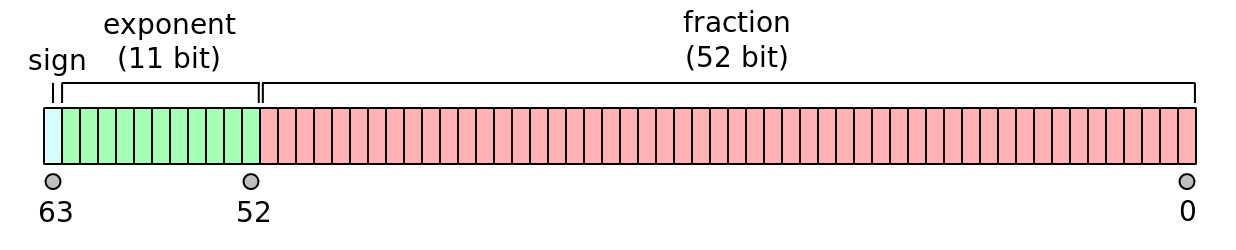

$3.14159 = 0.7853975 * 2^2$


### Comparing floats

As stated before, never test equality of two floats


In [296]:
0.1**2

0.010000000000000002

In [297]:
0.1**2==0.01

False

In [298]:
x = 1.1+2.2
print(x)
if x==3.3:
    print("equal")
else:
    print("not equal")

3.3000000000000003
not equal


Instead, require two floats to have difference less than some small number to test equality:

In [30]:
x = 1.1+2.2
epsilon = 1e-12
if abs(x-3.3)<epsilon:
    print("equal")

equal


In [31]:
x = 3.3
# float.as_integer_ratio()
#  Returns a pair of integers whose ratio is exactly 
#  equal to the original float and with a positive denominator.
print(x.as_integer_ratio()) # 
if x==x.as_integer_ratio():
    print("equal")
else:
    print("not equal")

(3715469692580659, 1125899906842624)
not equal


In [32]:
3715469692580659/1125899906842624

3.3

One can also utilize some numpy functions
* test two floats https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.isclose.html
* test two arrays element-wise
https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html

In [301]:
np.isclose(0.1**2,0.01)

True

In [302]:
np.isclose(1.1+2.2,3.3)

True

In [303]:
x = np.array([[3.141592, -0.1], [-0.1, 0.1]])
y = np.array([[math.pi, -0.1], [-0.1, 0.1]])
print(x)
print(y)
print(np.allclose(x,y))

[[ 3.141592 -0.1     ]
 [-0.1       0.1     ]]
[[ 3.14159265 -0.1       ]
 [-0.1         0.1       ]]
True


Also note that floating point addition is not associative or distributive

In [304]:
a,b,c = 1e14, 25.44, 0.74
print( (a+b)+c )
print( a+(b+c) )

100000000000026.17
100000000000026.19


In [305]:
a,b,c, = 100, 0.1, 0.2
print( a*b + a*c )
print( a*(b+c)   )

30.0
30.000000000000004


The upper bound of the relative error due to rounding is called the machine epsilon

In [306]:
eps = sys.float_info.epsilon
print(eps)

2.220446049250313e-16


In [307]:
x = 3.0
x+eps==x

True

In [308]:
x = 3.0
x+2*eps==x

False

## Loss of signficance

Suppose we had a machine with only 5 digits of precision 

Define two variables x and y:
```
x = 1.2345432 
y = 1.23451
```
With better precision subtraction would yield:
```
x - y = 0.0000332
```
But after rounding x and y become:
```
x = 1.23454 
y = 1.23451
```
And so
```
x-y = 0.0003
```

Initially we had two numbers, one with 8 signficant figures (sigfigs) and one with 6, and now we have a number with only 1 sigfig

Also note that the correct answer 3.32e-5 is within the precision of our machine.

**"Catastrophic cancellation"** - the loss of significance when subtracting two numbers which have only a small difference

This can also occur when a small number is added or subtracted from a much larger one:
```
12345.6 + 0.123456 = 12345.72345 (exact)
12345.6 + 0.123456 = 12345.7     (6 digits of precision)
```
In python you have 15 digits of precision so this is a smaller effect, but it can still cause problems when repeatedly adding numbers which can't be represented exactly:

In [33]:
# Caution: This takes a while to run

a=0.0
for i in range(1000000000):  #1e9
    a+=0.1
print(a)  #We expect 1e8
print(100000000-a) #Difference

99999998.74541782
1.2545821815729141


another example

$x=1$

$y=1+10^{-14}\sqrt{2}$

so therefore

$10^{14} (y-x) = \sqrt{2}$

in code:


In [310]:
from math import sqrt
x = 1.0
y = 1.0 + (1e-14)*sqrt(2)
print( sqrt(2) )
print( (1e14)*(y-x) )
print( sqrt(2) - (1e14)*(y-x))

1.4142135623730951
1.4210854715202004
-0.006871909147105226


only the first decimal place is accurate!
```


```

Python does provide one tool which avoids rounding errors when adding small numbers (fsum)

consider the built-in sum function and math.fsum

https://docs.python.org/3/library/functions.html#sum

https://docs.python.org/3/library/math.html#math.fsum

In [311]:
sum( (1,2,3) ) # sum requires a iterable list as an arguement

6

In [312]:
print(       sum( (.1, .1, .1, .1, .1, .1, .1, .1, .1, .1) ) )
print( math.fsum( (.1, .1, .1, .1, .1, .1, .1, .1, .1, .1) ) )

0.9999999999999999
1.0


## Numpy data types

numPy has amy more types than python
https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html

```
Data type   Description
bool_       Boolean (True or False) stored as a byte
int_        Default integer type (same as C long; int64 or int32)
intc        Identical to C int (normally int32 or int64)
intp        Integer used for indexing (C ssize_t; int32 or int64)
int8        Byte (-128 to 127)
int16       Integer (-32768 to 32767)
int32       Integer (-2147483648 to 2147483647)
int64       Integer (-9223372036854775808 to 9223372036854775807)
uint8       Unsigned integer (0 to 255)
uint16      Unsigned integer (0 to 65535)
uint32      Unsigned integer (0 to 4294967295)
uint64      Unsigned integer (0 to 18446744073709551615)
float_      Shorthand for float64.
float1      Half precision float: 
float32     Single precision float: 
float64     Double precision float: 
complex_    Shorthand for complex128.
complex64   Complex number, represented by two 32-bit floats 
complex128  Complex number, represented by two 64-bit floats 
```

In [313]:
f = np.arange(3, dtype=np.uint8)
print(f)
g = np.arange(3, dtype=np.float64)
print(g)
h = f.astype(float)  # type convert an array
print(h)

[0 1 2]
[ 0.  1.  2.]
[ 0.  1.  2.]


In [314]:
f.dtype  # check the type of an array

dtype('uint8')

python 3 ints are not subject to overflow (full precision as discussed earlier) 

numpy integer arrays map to underlying C data types and therefore are stored with a fixed number of bytes

for example, 16 bit integers have range 

$-32868$ to $32767$ 

In binary $-2^{15}$ to $2^{15}-1$

In [315]:
a = np.zeros(3, dtype=np.int16)
print(a)
a[0] = -30000
a[1] =  30000
a[2] =  40000
print(a)

[0 0 0]
[-30000  30000 -25536]


In [316]:
a[:]

array([-30000,  30000, -25536], dtype=int16)

In [317]:
import numpy as np
print( np.iinfo(np.int16).max  )
print( np.iinfo(np.int16).min  )
print( np.iinfo(np.uint64).max  )
print( np.iinfo(np.uint64).min  )
print( np.finfo(np.float64).max )
print( np.finfo(np.float64).min )

32767
-32768
18446744073709551615
0
1.79769313486e+308
-1.79769313486e+308


In [318]:
print(numpy.finfo(np.float64).eps)

2.22044604925e-16
